# Advanced Quickstart Guide

This tutorial fllows the same formoat as `Quickstart Guide` but explores further functionality provided by twinLab.

In [2]:
# Third-party imports
import numpy as np
import pandas as pd

# Project imports
import twinlab as tl

{'username': 'jasper@digilab.co.uk', 'credits': 0}

         === TwinLab Client Initialisation ===
         Version  : 1.4.0
         User     : jasper@digilab.co.uk
         Server   : https://qisuqloa39.execute-api.eu-west-2.amazonaws.com/prod
         Key      : btUUe-IkGFOyuLun-HJAjg



### API setup

When you first use twinLab you will have to set your API and server url

In [ ]:
# Set the API key
tl.set_api_key("my_api_key")

# Set the server url
tl.set_server_url("http://twinlab.digilab.co.uk/prod")

# Check which url is being used
tl.get_server_url()

### Your twinLab information

Confirm your twinLab version

In [14]:
tl.get_versions()

{'cloud': '2.0.0',
 'modal': '0.2.0',
 'library': '1.1.0',
 'image': 'twinlab-prod'}

Or view your user infomration including how many credits you have.

In [15]:
tl.get_user_information()

{'username': 'jasper@digilab.co.uk', 'credits': 0}

### Upload a dataset

twinLab requires datasets to be uploaded to the cloud with a `dataset_id`. This is what the data is saved as in the cloud and how models are able to access the data for training. Data can be uploaded in the form of a `pandas` dataframes directly from your code.

> 📝 **Note:** Your dataset must have column headers.

In [3]:
x = [0.6964691855978616,
0.28613933495037946,
0.2268514535642031,
0.5513147690828912,
0.7194689697855631,
0.42310646012446096,
0.9807641983846155,
0.6848297385848633,
0.48093190148436094,
0.3921175181941505]

y = [-0.8173739564129022,
0.8876561174050408,
0.921552660721474,
-0.3263338765412979,
-0.8325176123242133,
0.4006686354731812,
-0.16496626502368078,
-0.9607643657025954,
0.3401149876855609,
0.8457949914442409]

df = pd.DataFrame({'x': x, 'y': y})
display(df)

dataset_id = "example_data"

# Upload dataset using a local dataframe
tl.upload_dataset(df, dataset_id, verbose=True)

,x,y
0,0.696469,-0.817374
1,0.286139,0.887656
2,0.226851,0.921553
3,0.551315,-0.326334
4,0.719469,-0.832518
5,0.423106,0.400669
6,0.980764,-0.164966
7,0.684830,-0.960764
8,0.480932,0.340115
9,0.392118,0.845795


Dataframe is uploading.
Processing dataset.
Dataset example_data was processed.


Alternatively data can be upload directly from a csv by using a filepath. The filepath string is input into `tl.upload_dataset` in the exact same place the dataframe was.

In [ ]:
df_filepath = "example_data_folder/example_data.csv"

dataset_id = "example_data"

# Upload the dataset to the cloud
tl.upload_dataset(df_filepath, dataset_id, verbose=True)

### View datasets

Once a dataset has been upload it can be easily acccesed using built in twinLab functions. A list of all uploaded dataset can be produced, individual datasets can be printed and you can even querey a dataset to get a statistical summary of it.

In [11]:
# List all uploaded datasets
tl.list_datasets()

['ukaea',
 'modelselection',
 'data-error-std',
 'active-learning',
 'wiggle',
 'example_data',
 'test-data',
 'data-error',
 'data-scaling']

In [12]:
# View the data within the dataset
tl.view_dataset(dataset_id)

,x,y
0,0.696469,-0.817374
1,0.286139,0.887656
2,0.226851,0.921553
3,0.551315,-0.326334
4,0.719469,-0.832518
5,0.423106,0.400669
6,0.980764,-0.164966
7,0.684830,-0.960764
8,0.480932,0.340115
9,0.392118,0.845795


In [13]:
# Querey the dataset to get a statistical summary
tl.query_dataset(dataset_id)

,x,y
count,10.000000,10.000000
mean,0.544199,0.029383
std,0.229352,0.748191
min,0.226851,-0.960764
25%,0.399865,-0.694614
50%,0.516123,0.087574
75%,0.693559,0.734513
max,0.980764,0.921553


### Train a campaign

The `campaign` class is used to train and implement your surrogate models. As with the dataset an id is defined, this is what the model will be saved as in the cloud. When training a model the arguments are passed using a dictionary; here that dictionary is called `campaign_params`.

In [4]:
campaign_id = "example_campaign"

campaign_params = {
    "dataset_id": "example_data",   # This points the campaign to the uploaded dataset
    "inputs": ["x"],                # Using the datasets column headers define the input and output data
    "outputs": ["y"],
    "test_train_ratio": 0.8         # Determine how much data is used for training, here 80% is used to tran the model  
}                                   # and 20% is used to test it.     

# Start a new campaign and train a surrogate model
tl.train_campaign(campaign_params, campaign_id, verbose=True)

Model example_campaign has begun training.


### View campaigns

Just as with datasets all saved campaigns can be listed and queried.

In [17]:
# List campaigns
tl.list_campaigns()

['example_campaign',
 'active-learning',
 'data-error',
 'test-model',
 'wiggle',
 'ukaea',
 'test']

In [18]:
# View a campaigns parameters
tl.view_campaign(campaign_id)

{'id': 'example_campaign',
 'dataset_id': 'example_data',
 'inputs': ['x'],
 'outputs': ['y'],
 'train_test_ratio': 0.8,
 'modal_handle': 'fc-cf0QYsorEAT5RaaAaYsoy3'}

In [19]:
# View the status of a campaign
tl.query_campaign(campaign_id)

{'model_summary': "{'transformer_diagnostics': [], 'estimator_diagnostics': {'covar_module': ScaleKernel(\n  (base_kernel): MaternKernel(\n    (lengthscale_prior): GammaPrior()\n    (raw_lengthscale_constraint): Positive()\n  )\n  (outputscale_prior): GammaPrior()\n  (raw_outputscale_constraint): Positive()\n), 'mean_module': ConstantMean(), 'likelihood.noise_covar.raw_noise': array([0.00951705]), 'likelihood.noise_covar.noise_prior.concentration': array(1.10000002), 'likelihood.noise_covar.noise_prior.rate': array(0.05), 'likelihood.noise_covar.raw_noise_constraint.lower_bound': array(9.99999975e-05), 'likelihood.noise_covar.raw_noise_constraint.upper_bound': array(inf), 'mean_module.raw_constant': array(0.24830963), 'covar_module.raw_outputscale': array(0.49354216), 'covar_module.base_kernel.raw_lengthscale': array([[-0.66687529]]), 'covar_module.base_kernel.lengthscale_prior.concentration': array(3.), 'covar_module.base_kernel.lengthscale_prior.rate': array(6.), 'covar_module.base_k

### Using a predict campaign

The surrogate model is now trained and saved to the cloud under the campaign_id. It can now be used to make predictions. First an evaluation dataset containing only inputs is defined, as the campaign will provide the outputs. This can be done using a local pandas dataframe.

In [5]:
x_eval = np.linspace(0,1,128)

df_eval = pd.DataFrame({'x':x_eval})
display(df_eval)

df_mean, df_std = tl.predict_campaign(df_eval, campaign_id)

,x
0,0.000000
1,0.007874
2,0.015748
3,0.023622
4,0.031496
...,...
123,0.968504
124,0.976378
125,0.984252
126,0.992126


Alternatively the evaluation dataset can be uploaded driectly from a csv by using a filepath.

In [27]:
df_eval_filepath = "example_data_folder/example_eval_data.csv"

df_mean, df_std = tl.predict_campaign(df_eval, campaign_id)

### Viewing the results
`tl.predict_campaign` outputs mean values for each input and their standard deviation; this gives the abilty to nicely visualise the uncertainty in results.


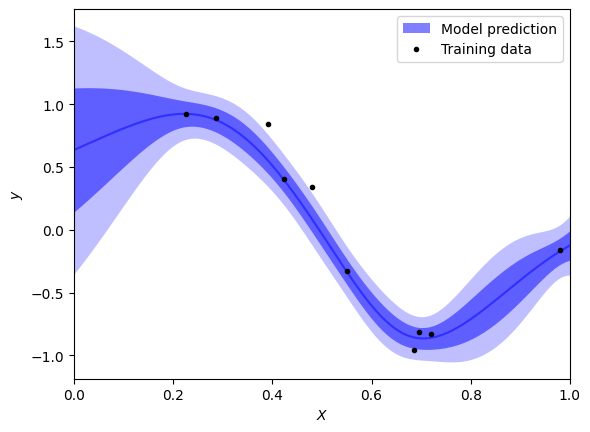

In [22]:
import matplotlib.pyplot as plt

# Plot parameters
nsigs = [1, 2]
# nsigs = [0.674, 1.960, 2.576]
color = "blue"
alpha = 0.5
plot_training_data = True
plot_model_mean = True
plot_model_bands = True

# Plot results
grid = df_eval["x"]
mean = df_mean["y"]
err = df_std["y"]
if plot_model_bands:
    label = r"Model prediction"
    plt.fill_between(grid, np.nan, np.nan, lw=0, color=color, alpha=alpha, label=label)
    for isig, nsig in enumerate(nsigs):
        plt.fill_between(grid, mean-nsig*err, mean+nsig*err, lw=0, color=color, alpha=alpha/(isig+1))
if plot_model_mean:
    label = r"Model prediction" if not plot_model_bands else None
    plt.plot(grid, mean, color=color, alpha=alpha, label=label)
if plot_training_data:
    plt.plot(df["x"], df["y"], ".", color="black", label="Training data")
plt.xlim((0.0, 1.0))
plt.xlabel(r"$X$")
plt.ylabel(r"$y$")
plt.legend()
plt.show()

### Using a sample campaign

The `tl.sample_campaign` function can be used to retrieve any number of results from your model. It requires the inputs for which you want the values and how many to calculate.

In [83]:
# Define the sample inputs
sample_inputs = pd.DataFrame({'x': np.linspace(0,1,20)})

# Define number of samples to calculate for each input
num_samples = 3

sample_result = tl.sample_campaign(sample_inputs, campaign_id, num_samples)

# View the results in the form of a fataframe
display(sample_result)

y                    
           0         1         2
0   0.497787  0.168380  0.133191
1   0.546246  0.419482  0.299494
2   0.698040  0.584040  0.550612
3   0.632806  0.736757  0.738357
4   0.742471  1.037026  0.802534
5   0.884464  0.896441  0.957100
6   0.797946  0.863950  1.028621
7   0.711041  0.713445  0.766685
8   0.515974  0.321171  0.454226
9   0.215597  0.148541  0.261076
10 -0.025277 -0.160484 -0.156788
11 -0.443163 -0.439760 -0.383151
12 -0.641506 -0.702780 -0.709237
13 -0.644622 -0.812828 -0.831037
14 -0.682562 -0.931627 -0.876349
15 -0.683580 -0.828496 -0.693702
16 -0.489581 -0.533035 -0.605241
17 -0.335044 -0.420223 -0.293260
18 -0.386511 -0.125380 -0.053165
19 -0.382265 -0.052727 -0.111953

### Viewing the results

The results can be plotted over the top of the previous graph giving a nice visualisation of the sampled data, with the model's uncertainity.

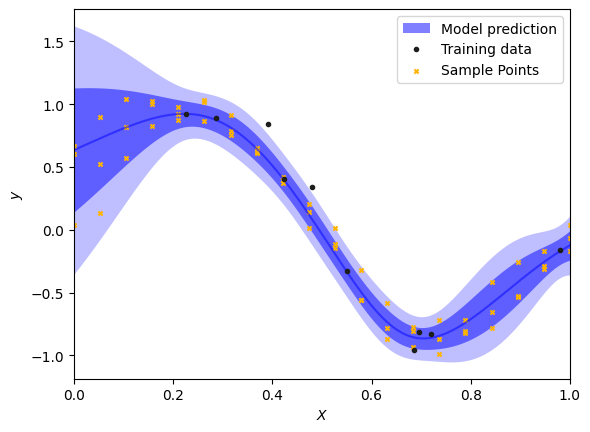

In [80]:
# Plot parameters
nsigs = [1, 2]
# nsigs = [0.674, 1.960, 2.576]
color = "blue"
alpha = 0.5
plot_training_data = True
plot_model_mean = True
plot_model_bands = True

# Plot results
grid = df_eval["x"]
mean = df_mean["y"]
err = df_std["y"]
if plot_model_bands:
    label = r"Model prediction"
    plt.fill_between(grid, np.nan, np.nan, lw=0, color=color, alpha=alpha, label=label)
    for isig, nsig in enumerate(nsigs):
        plt.fill_between(grid, mean-nsig*err, mean+nsig*err, lw=0, color=color, alpha=alpha/(isig+1))
if plot_model_mean:
    label = r"Model prediction" if not plot_model_bands else None
    plt.plot(grid, mean, color=color, alpha=alpha, label=label)
if plot_training_data:
    plt.plot(df["x"], df["y"], ".", color="#1d1d1b", label="Training data")
for i in range(num_samples):
    plt.scatter(sample_inputs, data[:,i], marker='x', s=9, c='#ffb500')
plt.scatter([], [], marker='x', s=9, c='#ffb500', label='Sampled Points')
plt.xlim((0.0, 1.0))
plt.xlabel(r"$X$")
plt.ylabel(r"$y$")
plt.legend()
plt.show()